In [29]:
import config
from cnn_builder import *
from dataset_functions import *
import gc
from hypercube_set import HypercubeSet
from hypercube_loader import *
import papers.aspn
import glob
import keras
import numpy as np
import os
import paths
import pickle
from rendering import *
import sys

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(os.getcwd().split("jupyter")[0])

%load_ext autoreload
%autoreload 2

inf = 2e32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
hc_set = HypercubeSet(hc_array=load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf))
hc_set.print_metadata()

Reading media/Mateus_2022/red\raw_112_rf.hdr ...
Reading media/Mateus_2022/red\raw_1984_rf.hdr ...
Reading media/Mateus_2022/red\raw_3904_rf.hdr ...
Reading media/Mateus_2022/red\raw_5744_rf.hdr ...
Reading media/Mateus_2022/red\raw_7584_rf.hdr ...
{(0, 0, 0): 0, (255, 128, 255): 1, (128, 128, 255): 2, (192, 128, 255): 3, (128, 255, 255): 4, (255, 128, 0): 5, (255, 255, 128): 6, (128, 255, 128): 7, (128, 255, 0): 8}
Class 0.0 has 5365230 pixels.
Class 1.0 has 142991 pixels.
Class 2.0 has 63525 pixels.
Class 3.0 has 71820 pixels.
Class 4.0 has 33755 pixels.
Class 5.0 has 50397 pixels.
Class 6.0 has 69152 pixels.
Class 7.0 has 34563 pixels.
Class 8.0 has 56567 pixels.
Min: 0.006377667188644409, Max: 0.16416394710540771, Size: (1840, 3200, 223)


In [43]:
num_classes = hc_set.get_num_classes()
num_classes -= 1
img_shape = (config.patch_size, config.patch_size, config.num_target_features)

X, y = hc_set.flatten()
X, y = remove_labels(X, y, [num_classes])

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


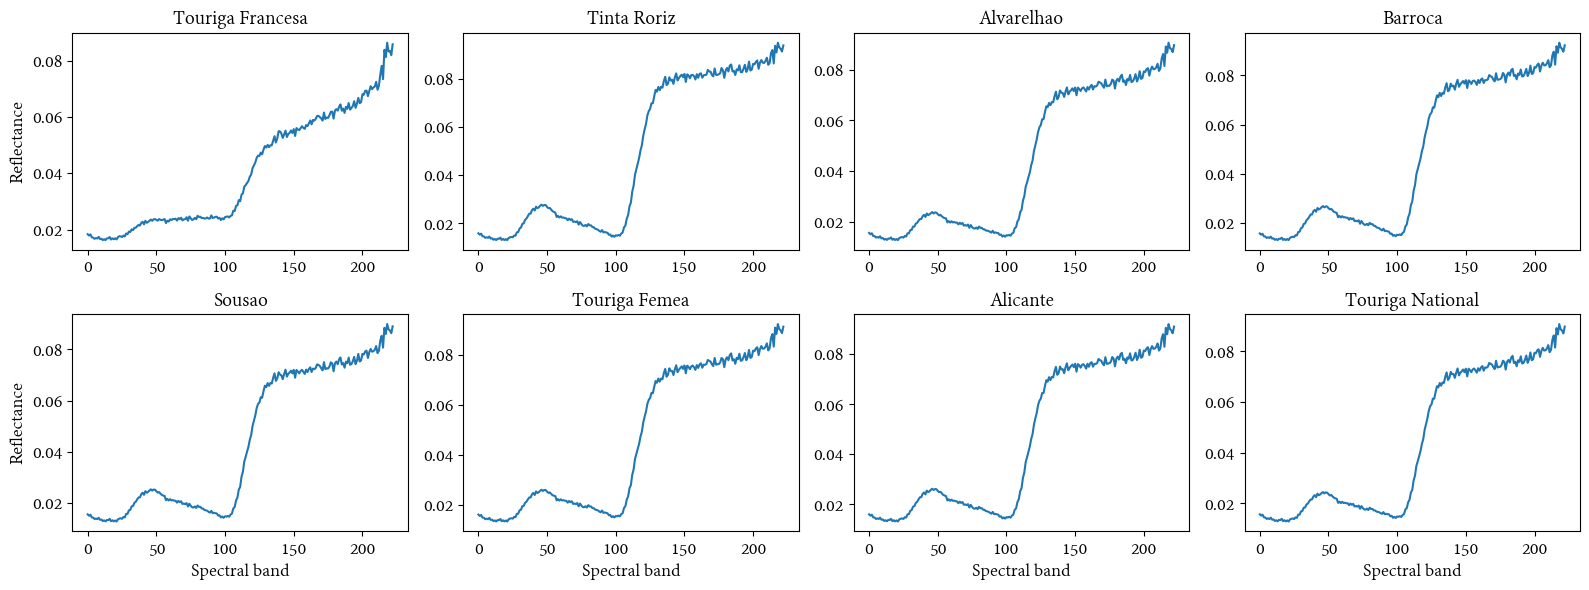

In [47]:
rendering.render_hc_spectrum_label(X, y)